# MSc in AI - CE6002 & CS5062


# E-tivity 3: Clustering and Manifold Learning
# Tasks 1 and 2

## Student Name: Mark Murnane
## Student ID: 18195326




Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

### Data Load

The data for Tasks 1 and 2 will be taken from the *loans_dataset_et3.csv* file.

In [2]:
df = pd.read_csv('loans_dataset_et3.csv', header=0)
print(f"Shape of the source data is {df.shape[0]} rows, each with {df.shape[1]} columns\n")
df.describe()

Shape of the source data is 332 rows, each with 5 columns



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


As *scikit-learn* APIs use Numpy arrays for data, take a copy of the data in that format now for later use.

In [3]:
loans_data = np.array(df.values)

## Task 1

### K-means clustering of the _loans_ dataset

Follow the examples in the notebook *Lab 3 - Clustering and Manifold Learning.ipynb* to cluster loans_dataset_et3.csv with the k-Means clustering algorithm and visualise the clustering.

Use an appropriate feature-scaling technique and pick a value of k suggested by MDS and t-SNE visualisations of the dataset


In [4]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [5]:
k = 3

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
loans_data = min_max_scaler.fit_transform(loans_data)

In [7]:
kmeans_data = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(loans_data)

In [8]:
kmeans_data_and_centers = np.r_[loans_data, kmeans_data.cluster_centers_]

In [9]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(kmeans_data_and_centers)

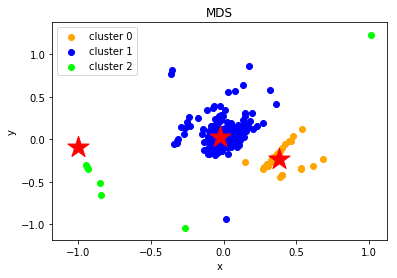

In [10]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=kmeans_data.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')


In [11]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(kmeans_data_and_centers)

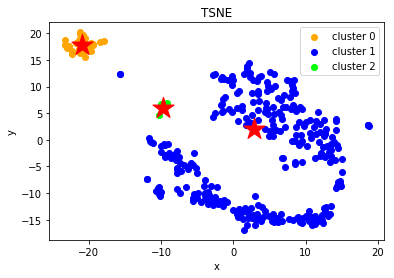

In [12]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=kmeans_data.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### Parameter adjustments

Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. 

### Conclusion

Write a short conclusion about the characteristics of the clusters (max 250 words).

## Task 2

### Identifying the correct value of k using the Elbow method



SSE at k value 2 = 20.2223
SSE at k value 3 = 14.0411
SSE at k value 4 = 10.5099
SSE at k value 5 = 9.0698
SSE at k value 6 = 7.7429
SSE at k value 7 = 6.6548
SSE at k value 8 = 5.6360
SSE at k value 9 = 4.9545
SSE at k value 10 = 4.3809
SSE at k value 11 = 4.0371
SSE at k value 12 = 3.7624
SSE at k value 13 = 3.4382
SSE at k value 14 = 3.0215
SSE at k value 15 = 2.8447
SSE at k value 16 = 2.5690
SSE at k value 17 = 2.3084
SSE at k value 18 = 2.1825
SSE at k value 19 = 2.0274


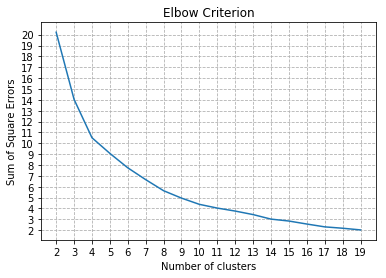

In [24]:
min_k = 2
max_k = 20

sum_squared_errors = np.empty(max_k - min_k)

for k in range (min_k, max_k):

    k_value_means = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(loans_data)

    # What value should the SSE be set to?
    sum_squared_errors[k-min_k] = k_value_means.inertia_
    
    print(f"SSE at k value {k} = {sum_squared_errors[k-min_k]:.4f}")

    
plt.title("Elbow Criterion")
    
# Plot the elbow-criterion as mentioned above. 
plt.plot(range(min_k,max_k), sum_squared_errors)
plt.ylabel("Sum of Square Errors")
plt.xlabel("Number of clusters")
plt.xticks(range(min_k, max_k))
plt.yticks(range(2, 21, 1))
plt.grid(True, linestyle='--')

plt.show()